In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle
import os

In [2]:
df = pd.read_csv('cars_data.csv', encoding='latin1')
df.head()

,brand,model,city,km,price
0,2015 Honda,CR-V,Pincourt · QC,211737.0,14495.0
1,2020 Hyundai,Kona,Blainville · QC,59842.0,18987.0
2,2009 Chevrolet,Corvette,Saint-Hyacinthe · QC,114622.0,34495.0
3,2019 Volkswagen,Golf Gti,Laval · QC,53016.0,26299.0
4,2020 Volkswagen,Golf,Saint-Eustache · QC,89766.0,23995.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   3083 non-null   object 
 1   model   3083 non-null   object 
 2   city    3083 non-null   object 
 3   km      3083 non-null   float64
 4   price   3083 non-null   float64
dtypes: float64(2), object(3)
memory usage: 120.6+ KB


# EDA

In [5]:
df['city'].unique()

array(['Pincourt · QC', 'Blainville · QC', 'Saint-Hyacinthe · QC',
       'Laval · QC', 'Saint-Eustache · QC', 'Saint-Hubert · QC',
       'Brossard · QC', 'Granby · QC', 'Cowansville · QC',
       'Saint-Jerome · QC', 'Drummondville · QC', 'Montreal · QC',
       'Notre-Dame-des-Prairies · QC', 'Saint-Remi · QC', 'Mirabel · QC',
       'Pointe-Claire · QC', 'Terrebonne · QC', 'Val-David · QC',
       'Boucherville · QC', 'Chambly · QC', 'Mascouche · QC',
       'Saint-Constant · QC'], dtype=object)

In [84]:
df.groupby('brand')['price'].mean().sort_values(ascending=False)

brand
2010 Porsche          76984.000000
2024 Bmw              72080.722222
2023 Mercedes-Benz    72038.500000
2024 Jeep             70018.000000
2023 Dodge            68743.000000
                          ...     
2007 Hyundai           4995.000000
2011 Hyundai           4899.000000
2010 Kia               3894.000000
2010 Hyundai           3699.000000
2008 Toyota            2888.000000
Name: price, Length: 328, dtype: float64

In [85]:
bmw_df = df[df['brand'].str.contains('Bmw')] 

In [86]:
benz_df = df[df['brand'].str.contains('Benz')] 
benz_df.head()

,brand,model,city,km,price
21,2016 Mercedes-Benz,CLA45,Cowansville · QC,63296.0,37384.0
42,2020 Mercedes-Benz,A-Class,Cowansville · QC,53834.0,31995.0
131,2019 Mercedes-Benz,GLC,Saint-Hubert · QC,83192.0,29499.0
132,2015 Mercedes-Benz,GLK-Class,Granby · QC,179535.0,16984.0
226,2020 Mercedes-Benz,GLC63 AMG,Laval · QC,65671.0,83995.0


<Axes: title={'center': 'BMW all models'}, xlabel='model', ylabel='price'>

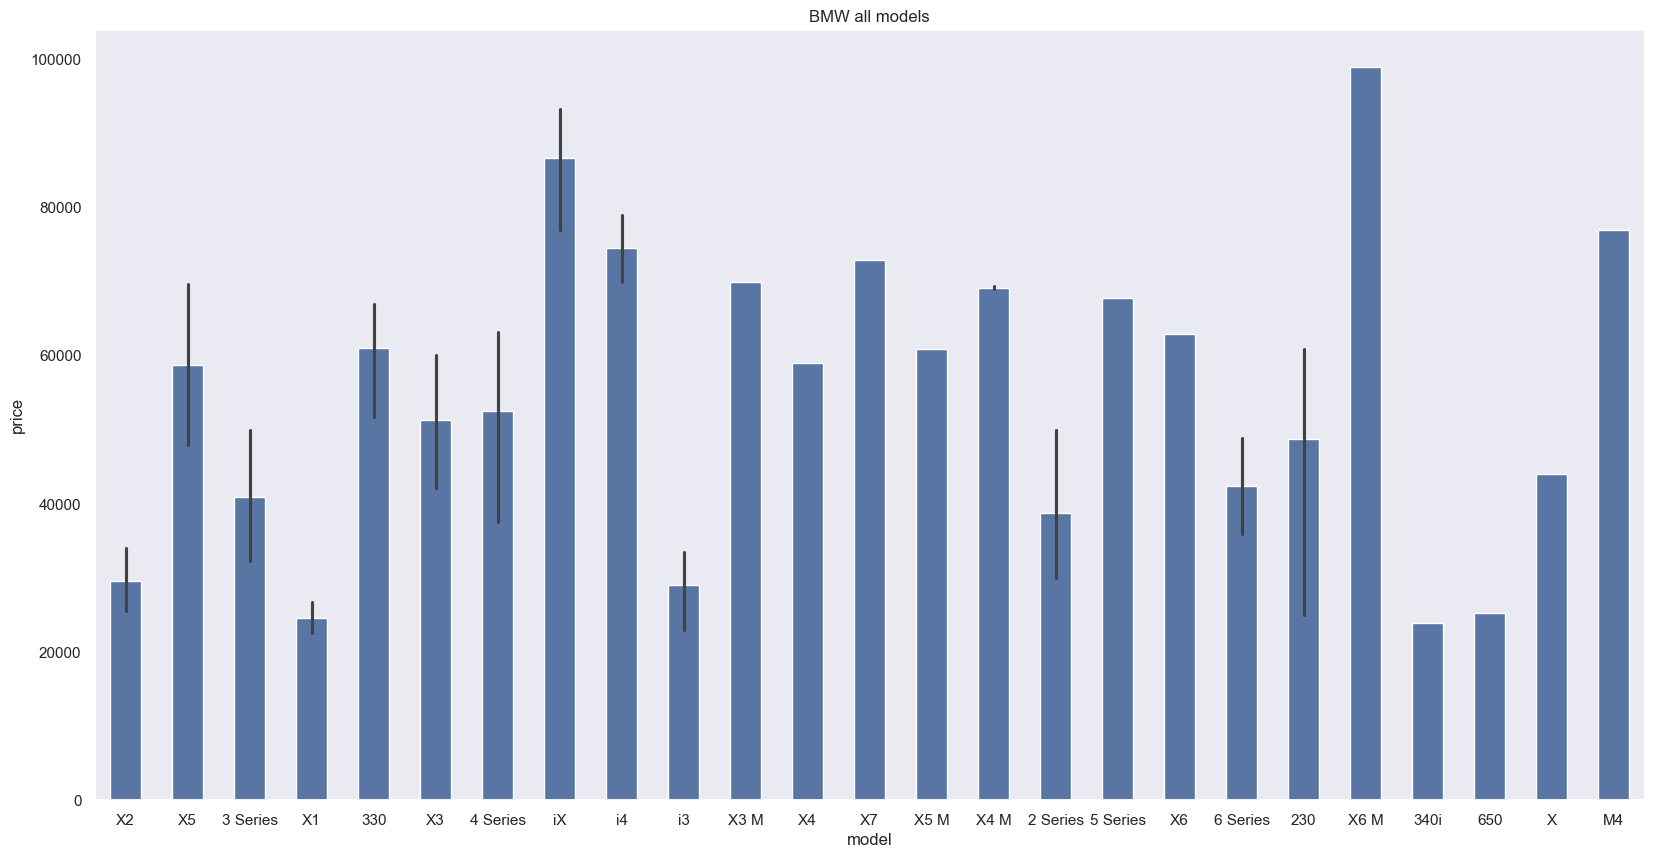

In [88]:
plt.figure(figsize=(20,10))
plt.grid()
plt.title('BMW all models')
sns.barplot(x=bmw_df['model'],y=bmw_df['price'],width=0.5)

<Axes: title={'center': 'Benz all models'}, xlabel='model', ylabel='price'>

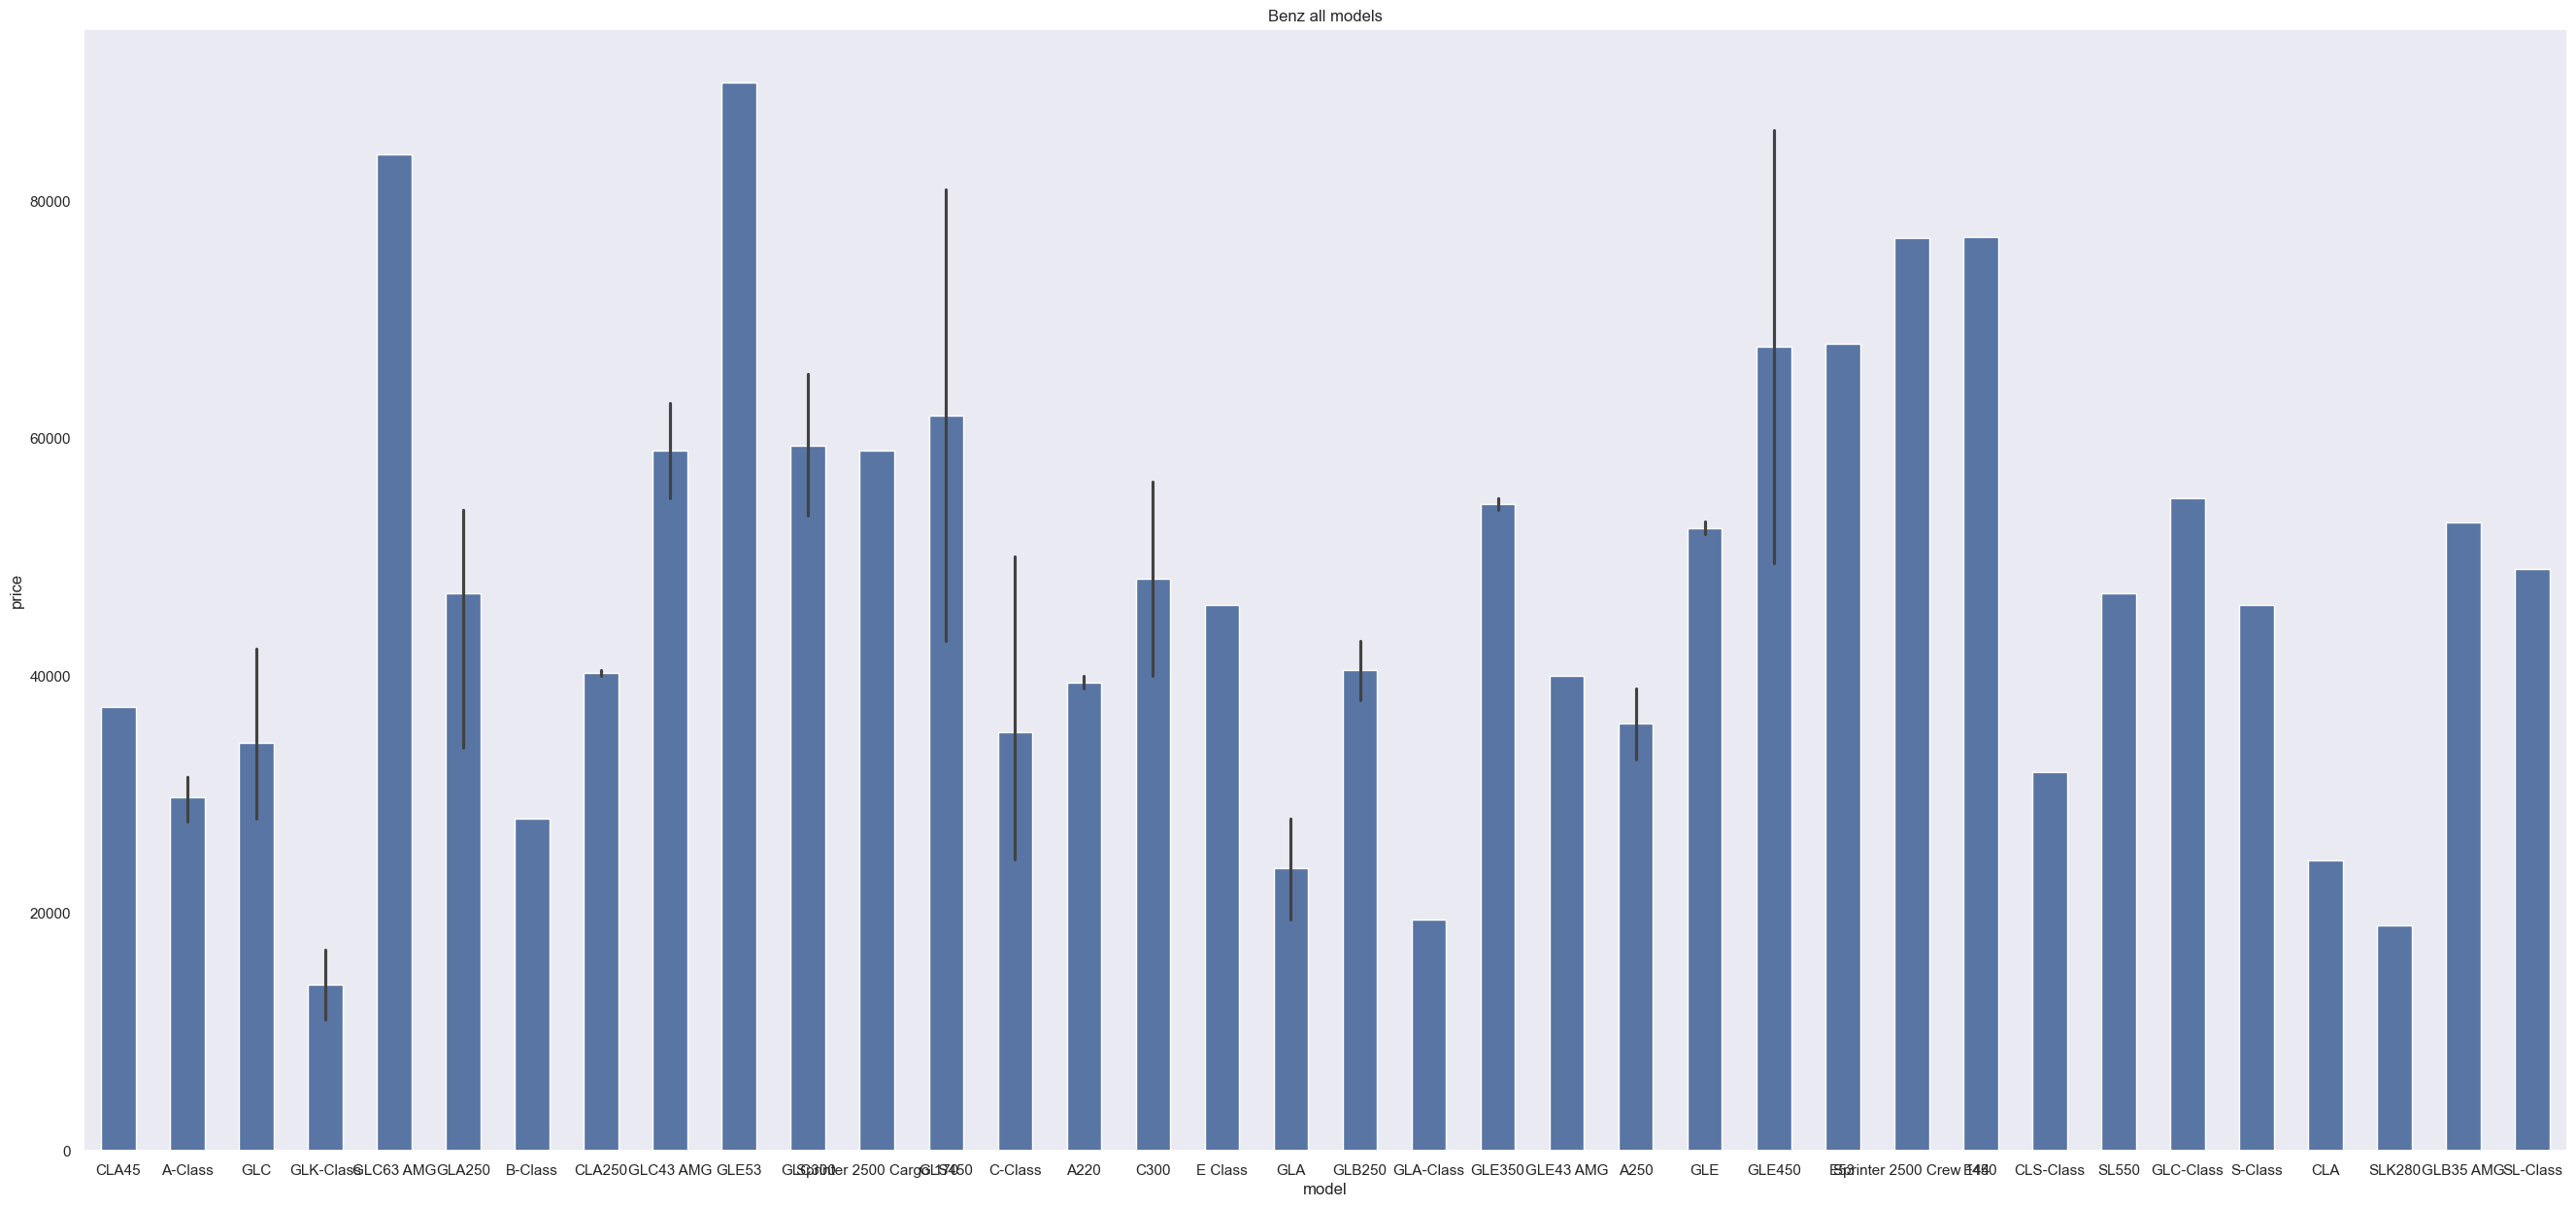

In [90]:
plt.figure(figsize=(33,15))
plt.grid()
plt.title('Benz all models')
sns.barplot(x=benz_df['model'],y=benz_df['price'],width=0.5)

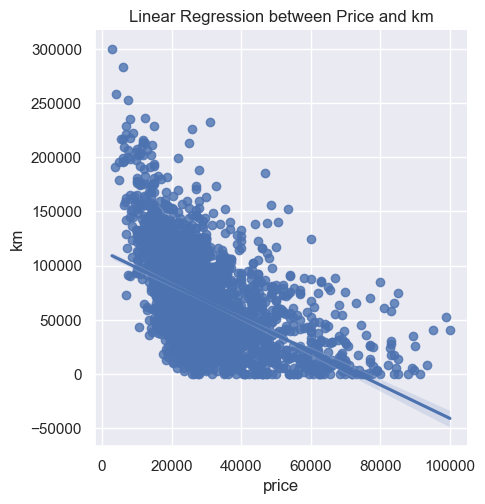

In [91]:
sns.lmplot(x='price',y='km',data=df)
plt.title('Linear Regression between Price and km')
plt.show()

In [92]:
no_brands = df['brand'].nunique()
print('Total number of brands ==> %s' % no_brands)

Total number of brands ==> 328


In [93]:
no_models = df['model'].nunique()
print('Total number of models ==> %s' % no_models)

Total number of models ==> 430


In [95]:
df.isnull().sum()

brand    0
model    0
city     0
km       0
price    0
dtype: int64

# Preprocessing

In [96]:
le_Brand = LabelEncoder()
le_Model = LabelEncoder()
le_City = LabelEncoder()

le_Brand.fit(df['brand'])
le_Model.fit(df['model'])
le_City.fit(df['city'])

LabelEncoder()

In [97]:
models_dir = 'Models'
with open(os.path.join(models_dir, 'le_Brand.pkl'), 'wb') as f1, open(os.path.join(models_dir, 'le_Model.pkl'), 'wb') as f2, open(os.path.join(models_dir, 'le_City.pkl'), 'wb') as f3:
    pickle.dump(le_Brand, f1)
    pickle.dump(le_Model, f2)
    pickle.dump(le_City, f3)

In [98]:
df['brand'] = le_Brand.transform(df['brand'])
df['model'] = le_Model.transform(df['model'])
df['city'] = le_City.transform(df['city'])

In [99]:
df.head()

,brand,model,city,km,price
0,74,69,12,211737.0,14495.0
1,215,222,0,59842.0,18987.0
2,11,112,17,114622.0,34495.0
3,200,194,7,53016.0,26299.0
4,232,192,15,89766.0,23995.0


In [100]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

<Axes: >

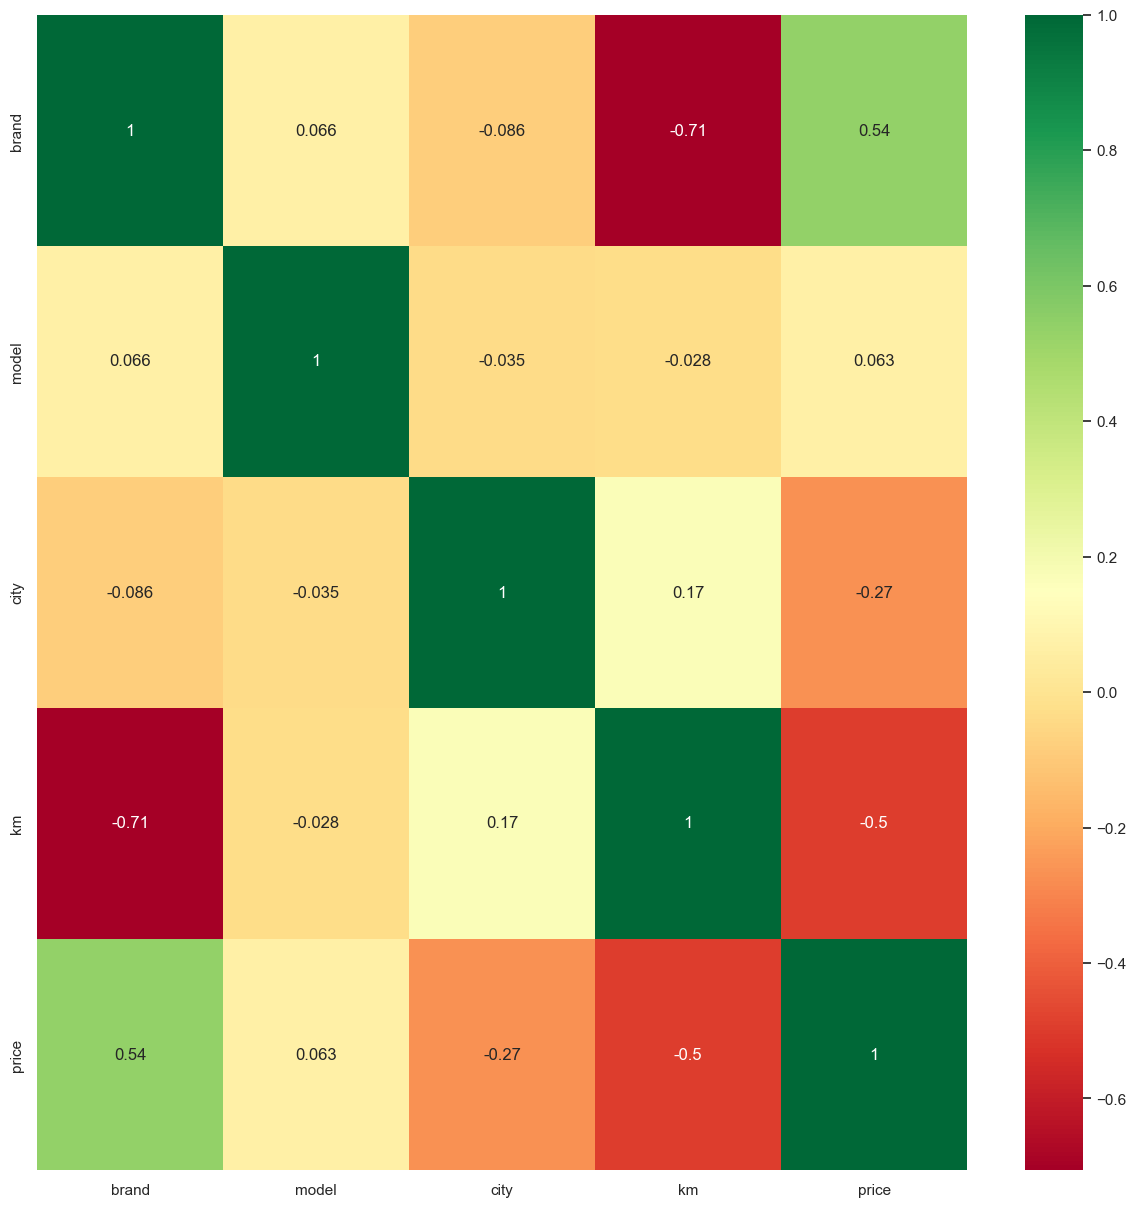

In [101]:
cor = df.corr()
sns.heatmap(cor,annot=True,cmap='RdYlGn')

In [102]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [103]:
StandardScaler_path = os.path.join('Models','StandardScaler.pkl')
with open(StandardScaler_path,'wb') as f:
    pickle.dump(sc,f)

In [104]:
X= sc.transform(X)

# Modelling

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=132)

In [110]:
StandardScaler_path = os.path.join('Models','SVR.pkl')
with open(StandardScaler_path,'wb') as f:
    pickle.dump(svr,f)

In [111]:
catboost = CatBoostRegressor(iterations=500000, learning_rate=0.0001, loss_function='RMSE', verbose=100)
catboost.fit(X_train, y_train, eval_set=(X_test, y_test))


y_pred_catboost = catboost.predict(X_test)


MSE_catboost = mean_squared_error(y_test, y_pred_catboost)
r2S_catboost = r2_score(y_test, y_pred_catboost)

print('Mean Squared Error is: ', MSE_catboost)
print("R2 Score:", r2S_catboost)

0:	learn: 13462.0031696	test: 13394.8442568	best: 13394.8442568 (0)	total: 9.46ms	remaining: 1h 18m 49s
100:	learn: 13407.8745675	test: 13345.9030773	best: 13345.9030773 (100)	total: 123ms	remaining: 10m 10s
200:	learn: 13354.0115344	test: 13297.2544390	best: 13297.2544390 (200)	total: 238ms	remaining: 9m 51s
300:	learn: 13300.9417345	test: 13249.1489381	best: 13249.1489381 (300)	total: 352ms	remaining: 9m 43s
400:	learn: 13248.5009604	test: 13201.8321770	best: 13201.8321770 (400)	total: 466ms	remaining: 9m 40s
500:	learn: 13196.3840333	test: 13154.4625204	best: 13154.4625204 (500)	total: 584ms	remaining: 9m 41s
600:	learn: 13145.2830708	test: 13108.4410712	best: 13108.4410712 (600)	total: 698ms	remaining: 9m 40s
700:	learn: 13094.3551096	test: 13062.4881561	best: 13062.4881561 (700)	total: 813ms	remaining: 9m 39s
800:	learn: 13044.3354076	test: 13017.4915165	best: 13017.4915165 (800)	total: 930ms	remaining: 9m 39s
900:	learn: 12994.8292369	test: 12972.8505389	best: 12972.8505389 (900)

In [113]:
catboost_path = os.path.join('Models','catboost.pkl')
with open(catboost_path,'wb') as f:
    pickle.dump(catboost,f)

# Result

<Axes: xlabel='price', ylabel='price'>

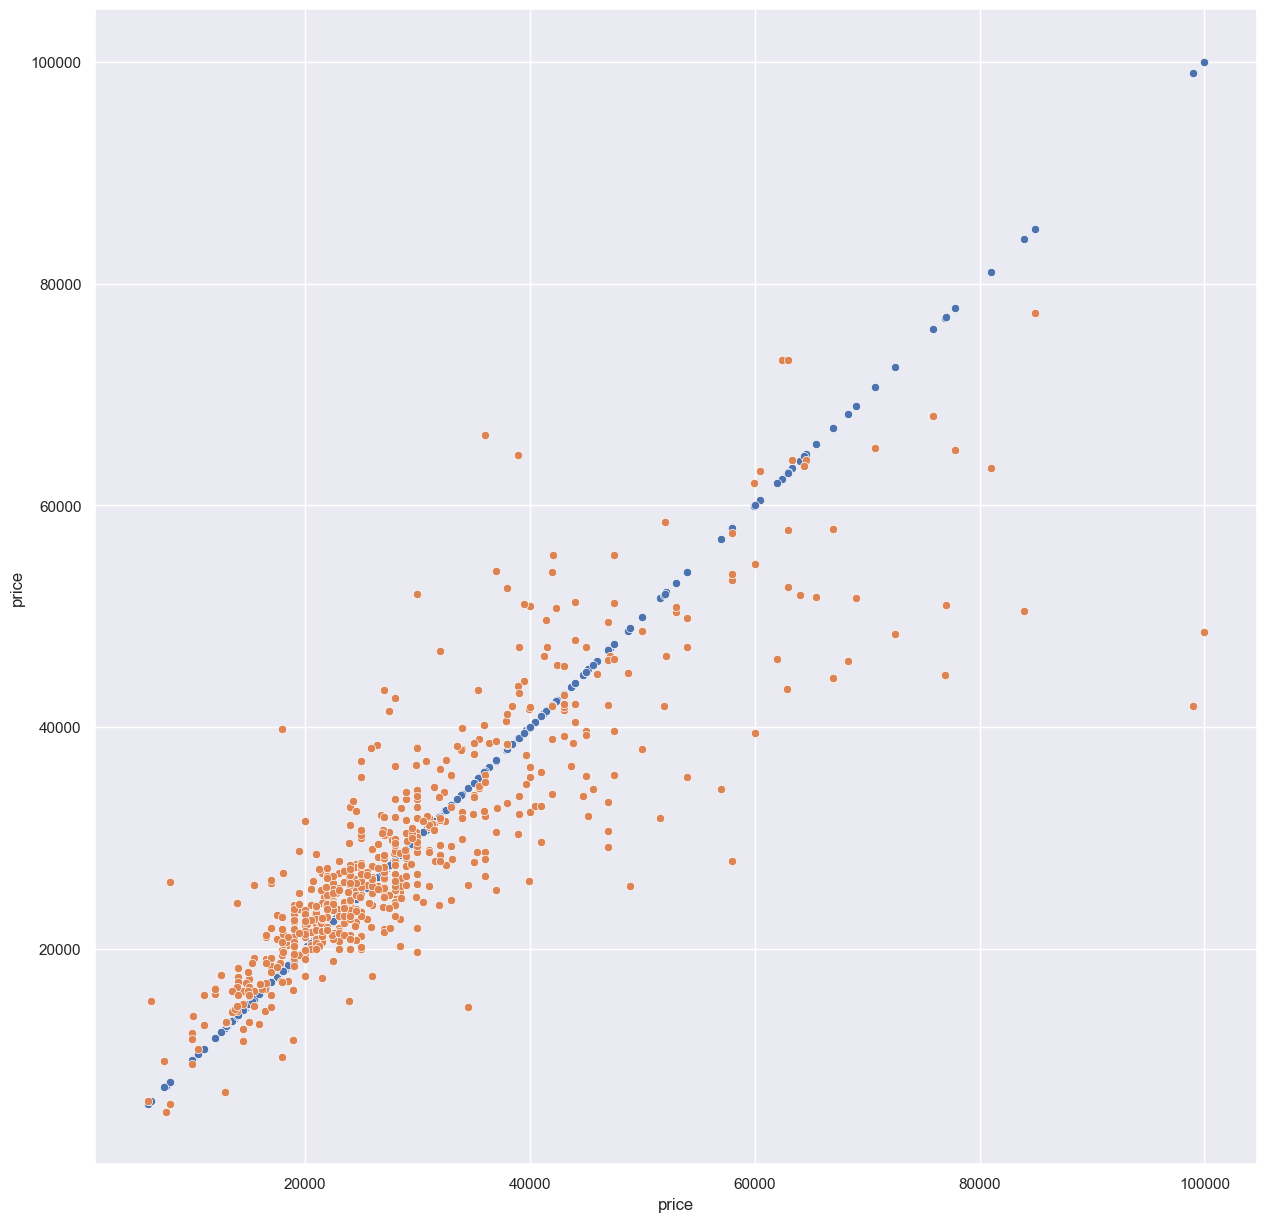

In [112]:
sns.scatterplot(x=y_test,y=y_test,legend='auto')
sns.scatterplot(x=y_test,y=y_pred_catboost,legend='auto')